<a href="https://colab.research.google.com/github/hanansuk/guns_n_roses/blob/main/lme_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
from datetime import datetime
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfb = tfp.bijectors

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('ggplot')

In [2]:
tf.compat.v1.enable_eager_execution()

In [3]:
token = 'GHSAT0AAAAAACDOBHUYV5GKVLDC3PVHL6ZMZEY7NEA'
deaths = pd.read_csv(f'https://raw.githubusercontent.com/hanansuk/guns_n_roses/main/cdc_monthly_state_gun_deaths_imputed.csv?token={token}')

In [4]:
token = 'GHSAT0AAAAAACDOBHUZYHDSRMEVITFM6FPAZELR2VQ'
laws = pd.read_csv(f'https://raw.githubusercontent.com/hanansuk/guns_n_roses/main/RAND.csv?token={token}')

In [4]:
deaths.head()

,Unnamed: 0,state,year,period,monthly_gun_deaths
0,0,Alaska,2021,2021/01,13.0
1,1,Alaska,2021,2021/02,10.0
2,2,Alaska,2021,2021/03,12.0
3,3,Alaska,2021,2021/04,18.0
4,4,Alaska,2021,2021/05,15.0


In [ ]:
laws.head()

In [5]:
deaths['period'] = pd.to_datetime(deaths.period, format='%Y/%m')

In [6]:
deaths['prior_monthly_deaths'] = deaths.groupby(['state'])['monthly_gun_deaths'].shift(1)

In [7]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(pd.DataFrame(data=deaths['state'].unique(), columns=['state']))

states_encoded = one_hot_encoder.transform(pd.DataFrame(data=deaths['state'].unique(), columns=['state']))
states_encoded = pd.DataFrame(data=states_encoded, columns=one_hot_encoder.categories_)
print('\nAfter One Hot Encoding:')
display(states_encoded)


After One Hot Encoding:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Alaska,Connecticut,Delaware,District of Columbia,Hawaii,Idaho,Iowa,Maine,Massachusetts,Montana,Nebraska,New Hampshire,North Dakota,Rhode Island,South Dakota,Utah,Vermont,Wyoming
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# One Hot Encode state names
deaths['state_encoded'] = [states_encoded[state].T.values.tolist()[0] for state in deaths['state']]

In [9]:
deaths = deaths[deaths['prior_monthly_deaths'].notnull()]
y = deaths['monthly_gun_deaths']
X = deaths.drop(['monthly_gun_deaths', 'Unnamed: 0', 'year', 'period'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
features_train = {
    'state': np.matrix([np.array(x) for x in X_train['state_encoded'].values]),
    'prior_monthly_gun_deaths': X_train['prior_monthly_deaths'].values.astype(np.int32)}
labels_train = y_train.values.astype(np.int32)

features_test = {
    'state': np.matrix([np.array(x) for x in X_test['state_encoded'].values]),
    'prior_monthly_gun_deaths': X_test['prior_monthly_deaths'].values.astype(np.int32)}
labels_test = y_test.values.astype(np.int32)

In [27]:
max_deaths = max(features_train['prior_monthly_gun_deaths']) + 1
state_names = deaths['state'].unique()
num_states = len(state_names) + 1

Code from: https://www.tensorflow.org/probability/examples/Linear_Mixed_Effects_Models

In [28]:
class LinearMixedEffectModel(tf.Module):
  def __init__(self):
    # Set up fixed effects and other parameters.
    # These are free parameters to be optimized in E-steps
    self._intercept = tf.Variable(0., name="intercept")
    # self._effect_state = [tf.Variable(0., name=f"effect_{state}") for state in state_names]
    self._stddev_deaths_t = tfp.util.TransformedVariable(
        1., bijector=tfb.Exp(), name="stddev_deaths_t")

  def __call__(self, features):
    model = tfd.JointDistributionSequential([
      # Set up random effects.
      tfd.MultivariateNormalDiag(
          loc=tf.zeros(max_deaths),
          scale_diag=self._stddev_deaths_t * tf.ones(max_deaths)),
      # This is the likelihood for the observed.
      lambda effect_deaths_t: tfd.Independent(
          tfd.Normal(
              loc=(#np.dot(self._effect_state, np.transpose(features["state"])) +
                  tf.gather(effect_deaths_t, features["prior_monthly_gun_deaths"], axis=-1) +
                  self._intercept),
              scale=1.),
              reinterpreted_batch_ndims=1)
    ])

    # To enable tracking of the trainable variables via the created distribution,
    # we attach a reference to `self`. Since all TFP objects sub-class
    # `tf.Module`, this means that the following is possible:
    # LinearMixedEffectModel()(features_train).trainable_variables
    # ==> tuple of all tf.Variables created by LinearMixedEffectModel.
    model._to_track = self
    return model

lmm_jointdist = LinearMixedEffectModel()
# Conditioned on feature/predictors from the training data
lmm_train = lmm_jointdist(features_train)

In [29]:
lmm_train.trainable_variables

(<tf.Variable 'intercept:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'stddev_deaths_t:0' shape=() dtype=float32, numpy=0.0>)

In [30]:
lmm_train.resolve_graph()

(('effect_deaths_t', ()), ('x', ('effect_deaths_t',)))

In [31]:
target_log_prob_fn = lambda *x: lmm_train.log_prob(x + (labels_train,))
trainable_variables = lmm_train.trainable_variables
current_state = lmm_train.sample()[:-1]

In [32]:
# For debugging
target_log_prob_fn(*current_state)

<tf.Tensor: shape=(), dtype=float32, numpy=-161846.75>

In [33]:
# Set up E-step (MCMC).
hmc = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=target_log_prob_fn,
    step_size=0.015,
    num_leapfrog_steps=3)
kernel_results = hmc.bootstrap_results(current_state)

@tf.function(autograph=False, jit_compile=True)
def one_e_step(current_state, kernel_results):
  next_state, next_kernel_results = hmc.one_step(
      current_state=current_state,
      previous_kernel_results=kernel_results)
  return next_state, next_kernel_results

optimizer = tf.optimizers.Adam(learning_rate=.01)

# Set up M-step (gradient descent).
@tf.function(autograph=False, jit_compile=True)
def one_m_step(current_state):
  with tf.GradientTape() as tape:
    loss = -target_log_prob_fn(*current_state)
  grads = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(grads, trainable_variables))
  return loss

In [34]:
num_warmup_iters = 1000
num_iters = 1500
num_accepted = 0
effect_prior_deaths_samples = np.zeros([num_iters, max_deaths])
loss_history = np.zeros([num_iters])

In [36]:
# Run warm-up stage.
for t in range(num_warmup_iters):
  current_state, kernel_results = one_e_step(current_state, kernel_results)
  num_accepted += kernel_results.is_accepted.numpy()
  if t % 500 == 0 or t == num_warmup_iters - 1:
    print("Warm-Up Iteration: {:>3} Acceptance Rate: {:.3f}".format(
        t, num_accepted / (t + 1)))

num_accepted = 0  # reset acceptance rate counter

# Run training.
for t in range(num_iters):
  # run 5 MCMC iterations before every joint EM update
  for _ in range(5):
    current_state, kernel_results = one_e_step(current_state, kernel_results)
  loss = one_m_step(current_state)
  effect_prior_deaths_samples[t, :] = current_state[0].numpy()
  num_accepted += kernel_results.is_accepted.numpy()
  loss_history[t] = loss.numpy()
  if t % 500 == 0 or t == num_iters - 1:
    print("Iteration: {:>4} Acceptance Rate: {:.3f} Loss: {:.3f}".format(
        t, num_accepted / (t + 1), loss_history[t]))

Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.996
Warm-Up Iteration: 999 Acceptance Rate: 0.994
Iteration:    0 Acceptance Rate: 1.000 Loss: 27000.463
Iteration:  500 Acceptance Rate: 0.994 Loss: 25793.424
Iteration: 1000 Acceptance Rate: 0.985 Loss: 25243.658
Iteration: 1499 Acceptance Rate: 0.987 Loss: 25051.609


In [37]:
@tf.function(autograph=False, jit_compile=True)
def run_k_e_steps(k, current_state, kernel_results):
  _, next_state, next_kernel_results = tf.while_loop(
      cond=lambda i, state, pkr: i < k,
      body=lambda i, state, pkr: (i+1, *one_e_step(state, pkr)),
      loop_vars=(tf.constant(0), current_state, kernel_results)
  )
  return next_state, next_kernel_results

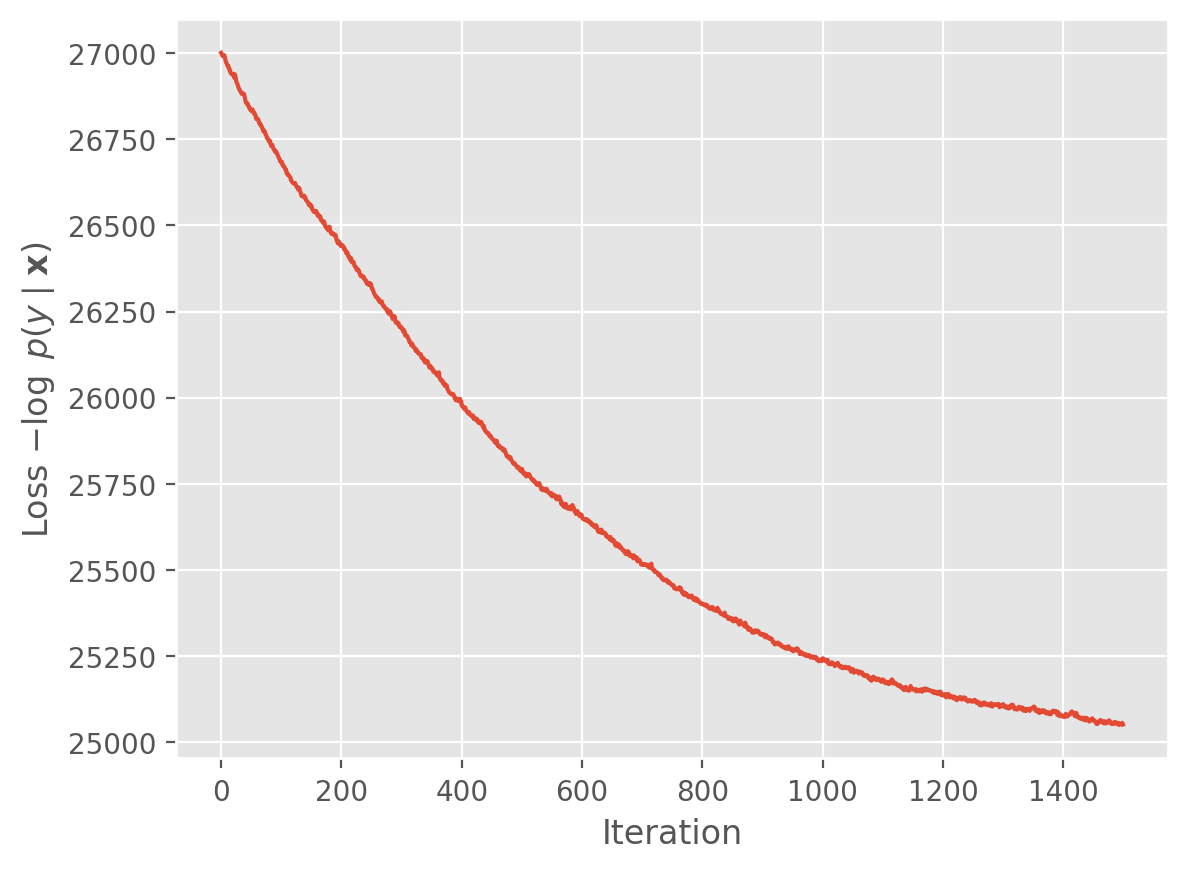

In [40]:
plt.plot(loss_history)
plt.ylabel(r'Loss $-\log$ $p(y\mid\mathbf{x})$')
plt.xlabel('Iteration')
plt.show()

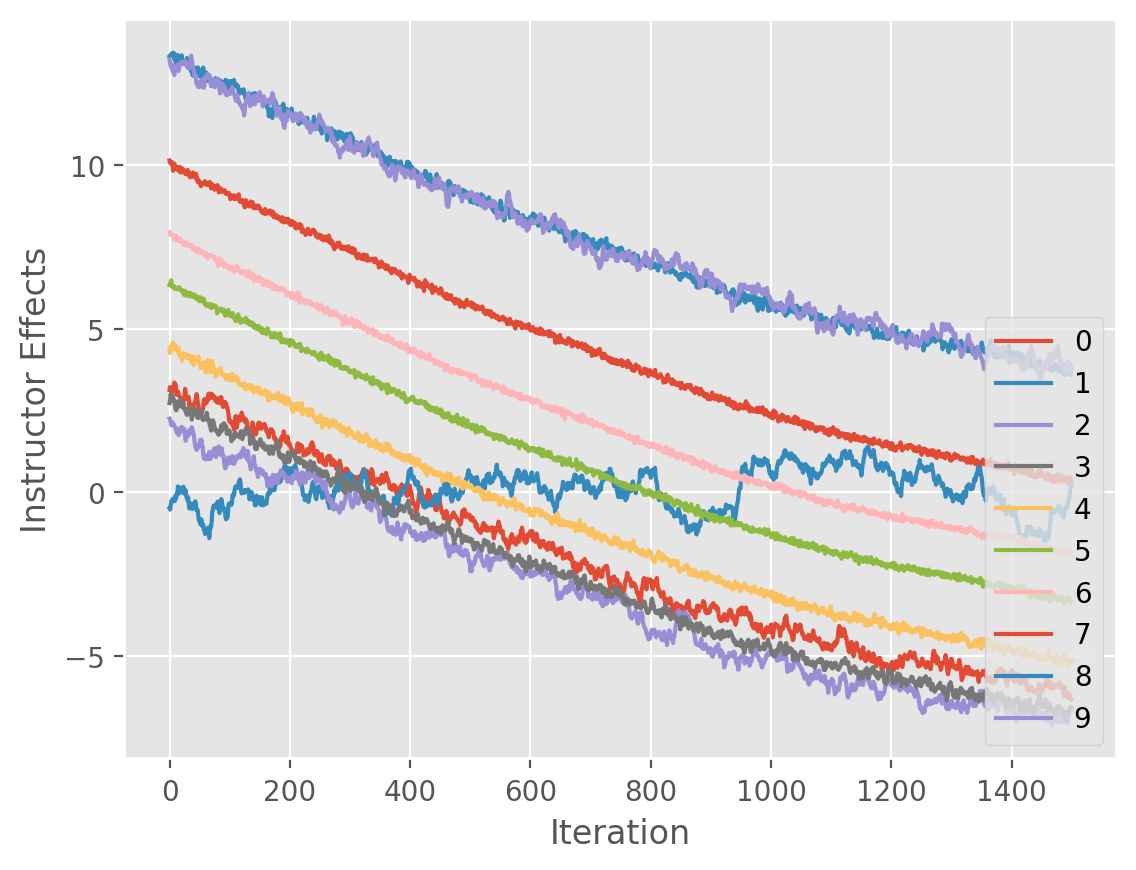

In [42]:
# TODO: Change plot to states effects once it's included in the model.
for i in range(10):
  plt.plot(effect_prior_deaths_samples[:, i])

plt.legend([i for i in range(10)], loc='lower right')
plt.ylabel('Instructor Effects')
plt.xlabel('Iteration')
plt.show()

In [71]:
lmm_test = lmm_jointdist(features_test)

effect_prior_deaths_mean = np.mean(effect_prior_deaths_samples, axis=0).astype(np.float32)


# Get the posterior predictive distribution
(*posterior_conditionals, ratings_posterior), _ = lmm_test.sample_distributions(
    value=(effect_prior_deaths_mean,))

ratings_prediction = ratings_posterior.mean()

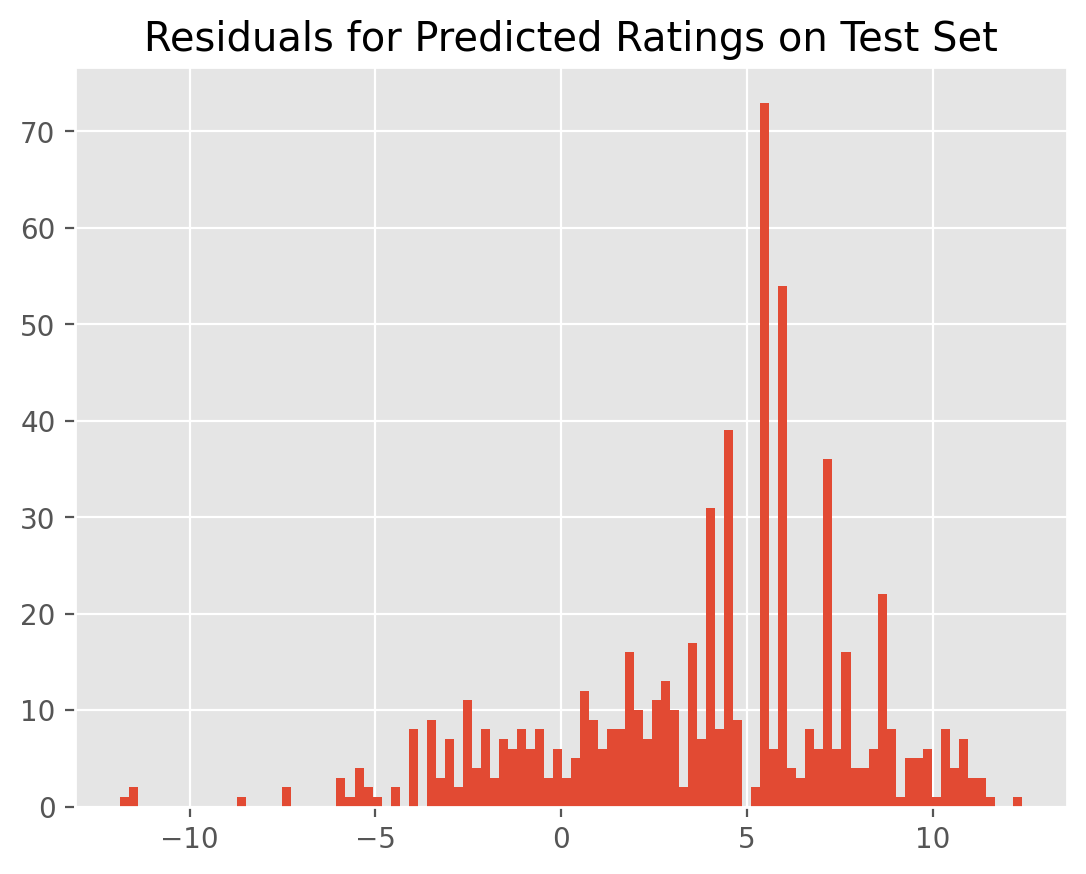

In [75]:
plt.title("Residuals for Predicted Ratings on Test Set")
plt.hist(ratings_prediction - labels_test, 100)
plt.show()

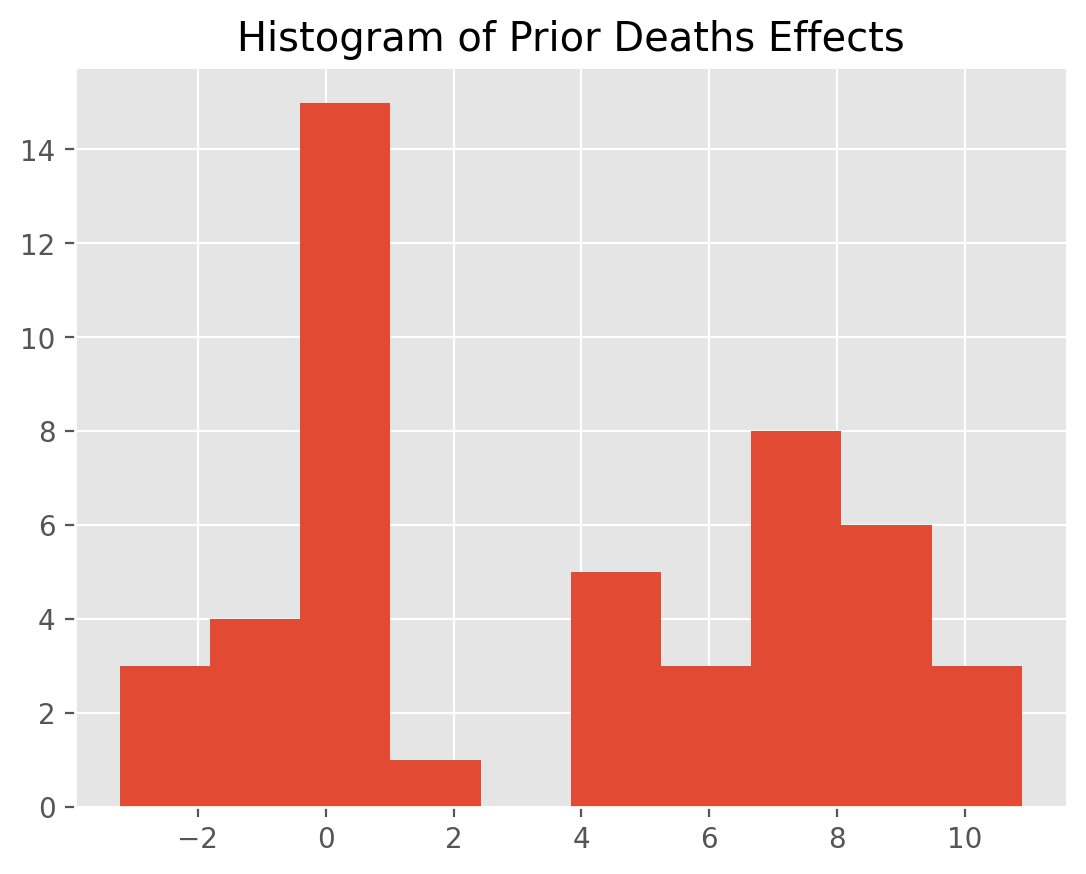

In [79]:
plt.title("Histogram of Prior Deaths Effects")
plt.hist(effect_prior_deaths_mean)
plt.show()